## Model Training

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
# from xgboost import XGRegressor
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [30]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Preparing X and Y variable

In [31]:
X = df.drop(columns=["math_score"], axis=1)

In [32]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333
2,female,group B,master's degree,standard,none,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.333333
4,male,group C,some college,standard,none,78,75,229,76.333333


In [33]:
print("Categoricsl in 'gender' variable:     ",end=" ")
print(df['gender'].unique())

print("Categoricsl in 'race_ethnicity' variable:     ",end=" ")
print(df['race_ethnicity'].unique())

print("Categoricsl in '	parental_level_of_education' variable:     ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categoricsl in 'lunch' variable:     ",end=" ")
print(df['lunch'].unique())

print("Categoricsl in 'test_preparation_course' variable:     ",end=" ")
print(df['lunch'].unique())

Categoricsl in 'gender' variable:      ['female' 'male']
Categoricsl in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categoricsl in '	parental_level_of_education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categoricsl in 'lunch' variable:      ['standard' 'free/reduced']
Categoricsl in 'test_preparation_course' variable:      ['standard' 'free/reduced']


In [34]:
y = df['math_score']

In [35]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [36]:
# Create columns Transform with 3 type of transformers
num_feature = X.select_dtypes(exclude="object").columns
cat_feature = X.select_dtypes(include="object").columns


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessing = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_feature),
        ("StandardScaler", numeric_transformer, num_feature),
    ]
)

In [37]:
X = preprocessing.fit_transform(X)

In [38]:
X.shape

(1000, 21)

# Applying Train Test Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 44)

print(X_train.shape)
print(X_test.shape)

(800, 21)
(200, 21)


In [40]:
# Creating an evalution function to give all metrics after model training

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

In [41]:
# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K - Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

# Assuming you have a function evaluate_model(y_true, y_pred) returning: MAE, RMSE, R2
for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(name)
    model_list.append(name)

    print("Model performance for Training set")
    print(" - Root Mean Square Error: {:.4f}".format(model_train_rmse))
    print(" - Mean Absolute Error: {:.4f}".format(model_train_mae))       
    print(" - R2 Score: {:.4f}".format(model_train_r2))          

    print("-" * 40)

    print("Model performance for Test set")
    print(" - Root Mean Square Error: {:.4f}".format(model_test_rmse))
    print(" - Mean Absolute Error: {:.4f}".format(model_test_mae))
    print(" - R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("=" * 40)
    print("\n")

Linear Regression
Model performance for Training set
 - Root Mean Square Error: 0.0000
 - Mean Absolute Error: 0.0000
 - R2 Score: 1.0000
----------------------------------------
Model performance for Test set
 - Root Mean Square Error: 0.0000
 - Mean Absolute Error: 0.0000
 - R2 Score: 1.0000


Lasso
Model performance for Training set
 - Root Mean Square Error: 4.6994
 - Mean Absolute Error: 3.7136
 - R2 Score: 0.9033
----------------------------------------
Model performance for Test set
 - Root Mean Square Error: 4.5540
 - Mean Absolute Error: 3.6047
 - R2 Score: 0.9118


Ridge
Model performance for Training set
 - Root Mean Square Error: 0.3394
 - Mean Absolute Error: 0.2697
 - R2 Score: 0.9995
----------------------------------------
Model performance for Test set
 - Root Mean Square Error: 0.3383
 - Mean Absolute Error: 0.2764
 - R2 Score: 0.9995


K - Neighbors Regressor
Model performance for Training set
 - Root Mean Square Error: 4.3416
 - Mean Absolute Error: 3.3883
 - R2 Sco

# Result

In [42]:
pd.DataFrame(list(zip(model_list, r2_list)),columns =["Model name", "R2_Score"]).sort_values(by=["R2_Score"],ascending=False)

,Model name,R2_Score
0,Linear Regression,1.000000
2,Ridge,0.999513
5,Random Forest Regressor,0.967205
6,AdaBoost Regressor,0.925435
4,Decision Tree,0.915004
1,Lasso,0.911777
3,K - Neighbors Regressor,0.899561


# Linear Regression

In [43]:
lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 100.00


# Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

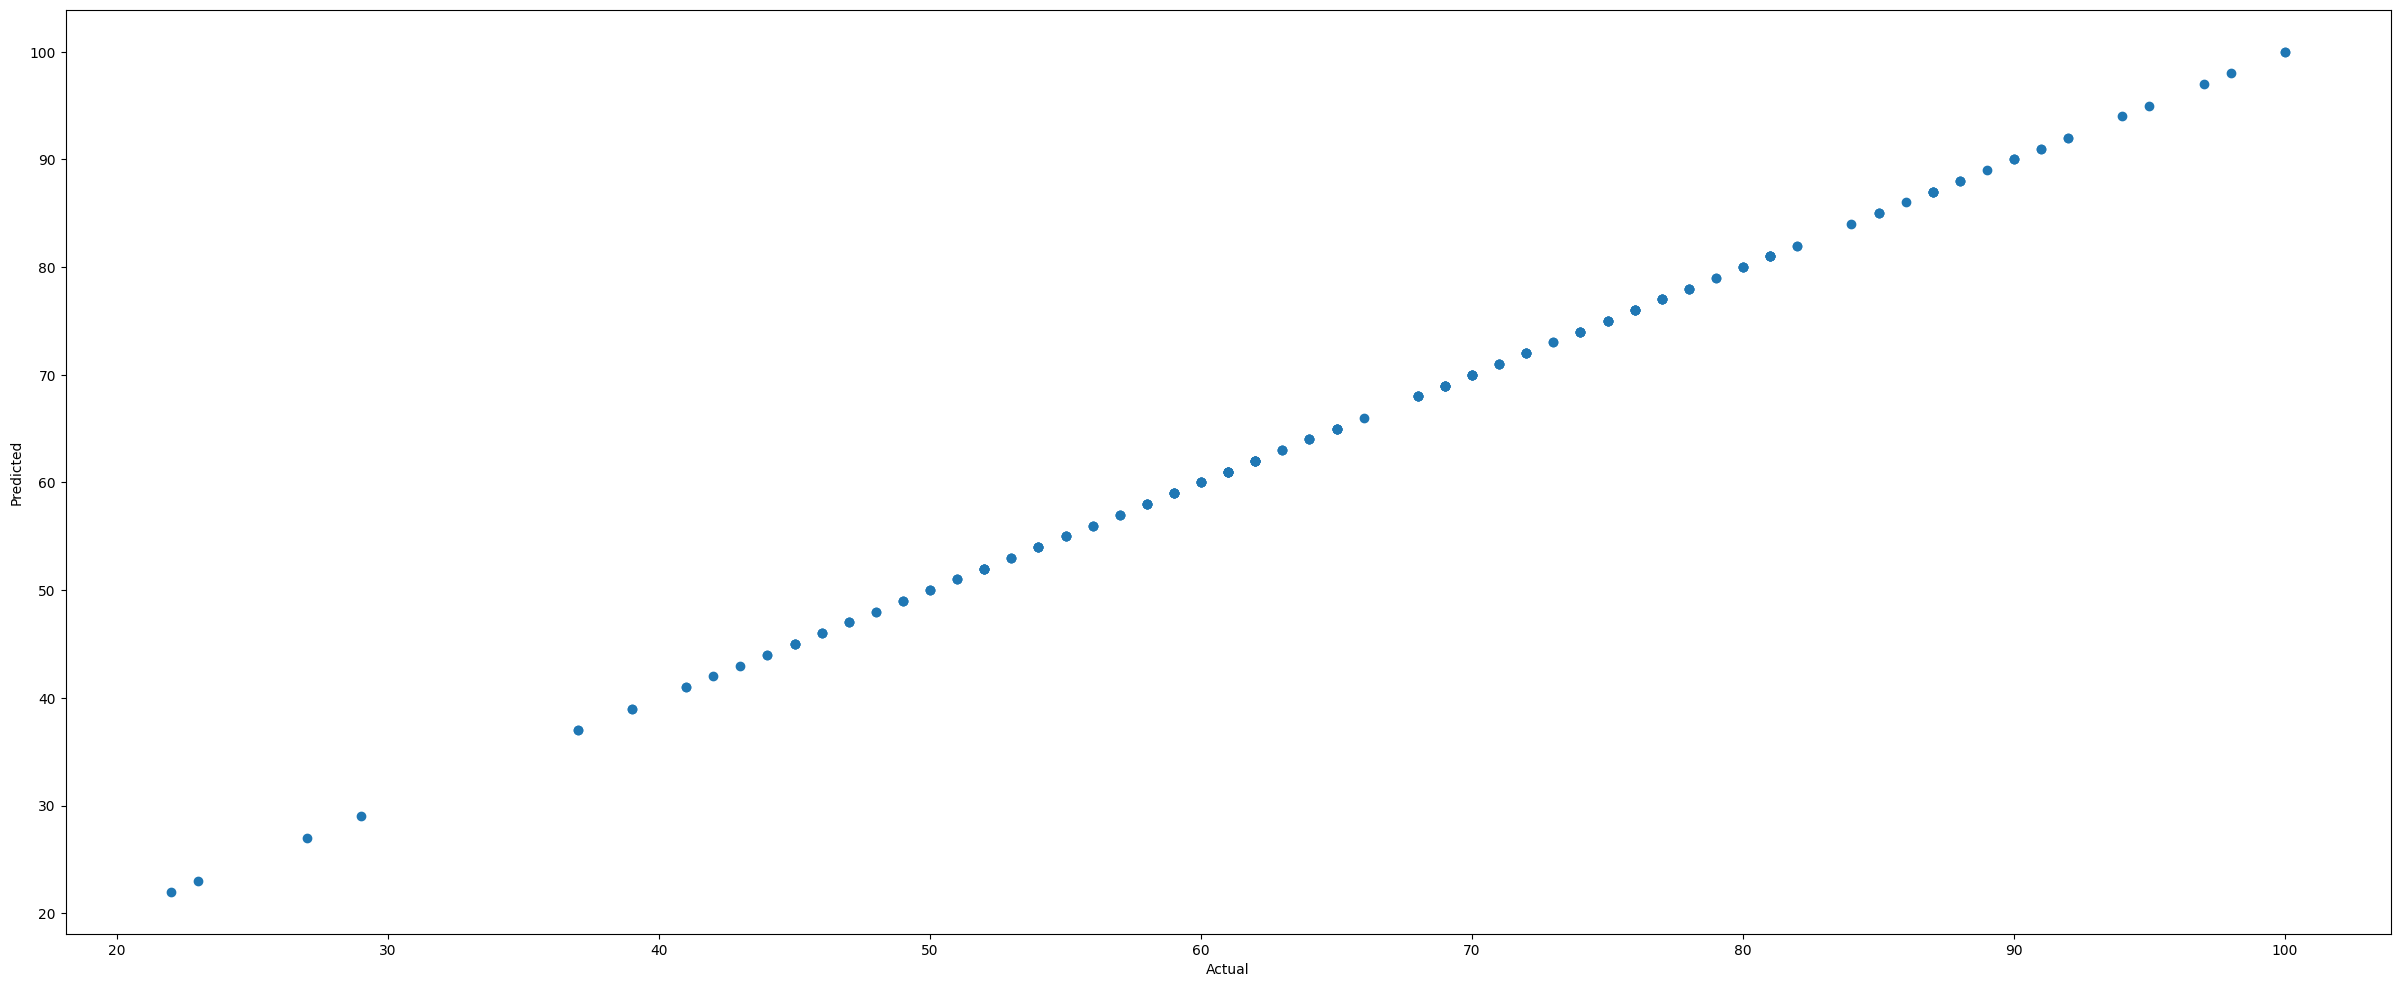

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")


<Axes: xlabel='math_score'>

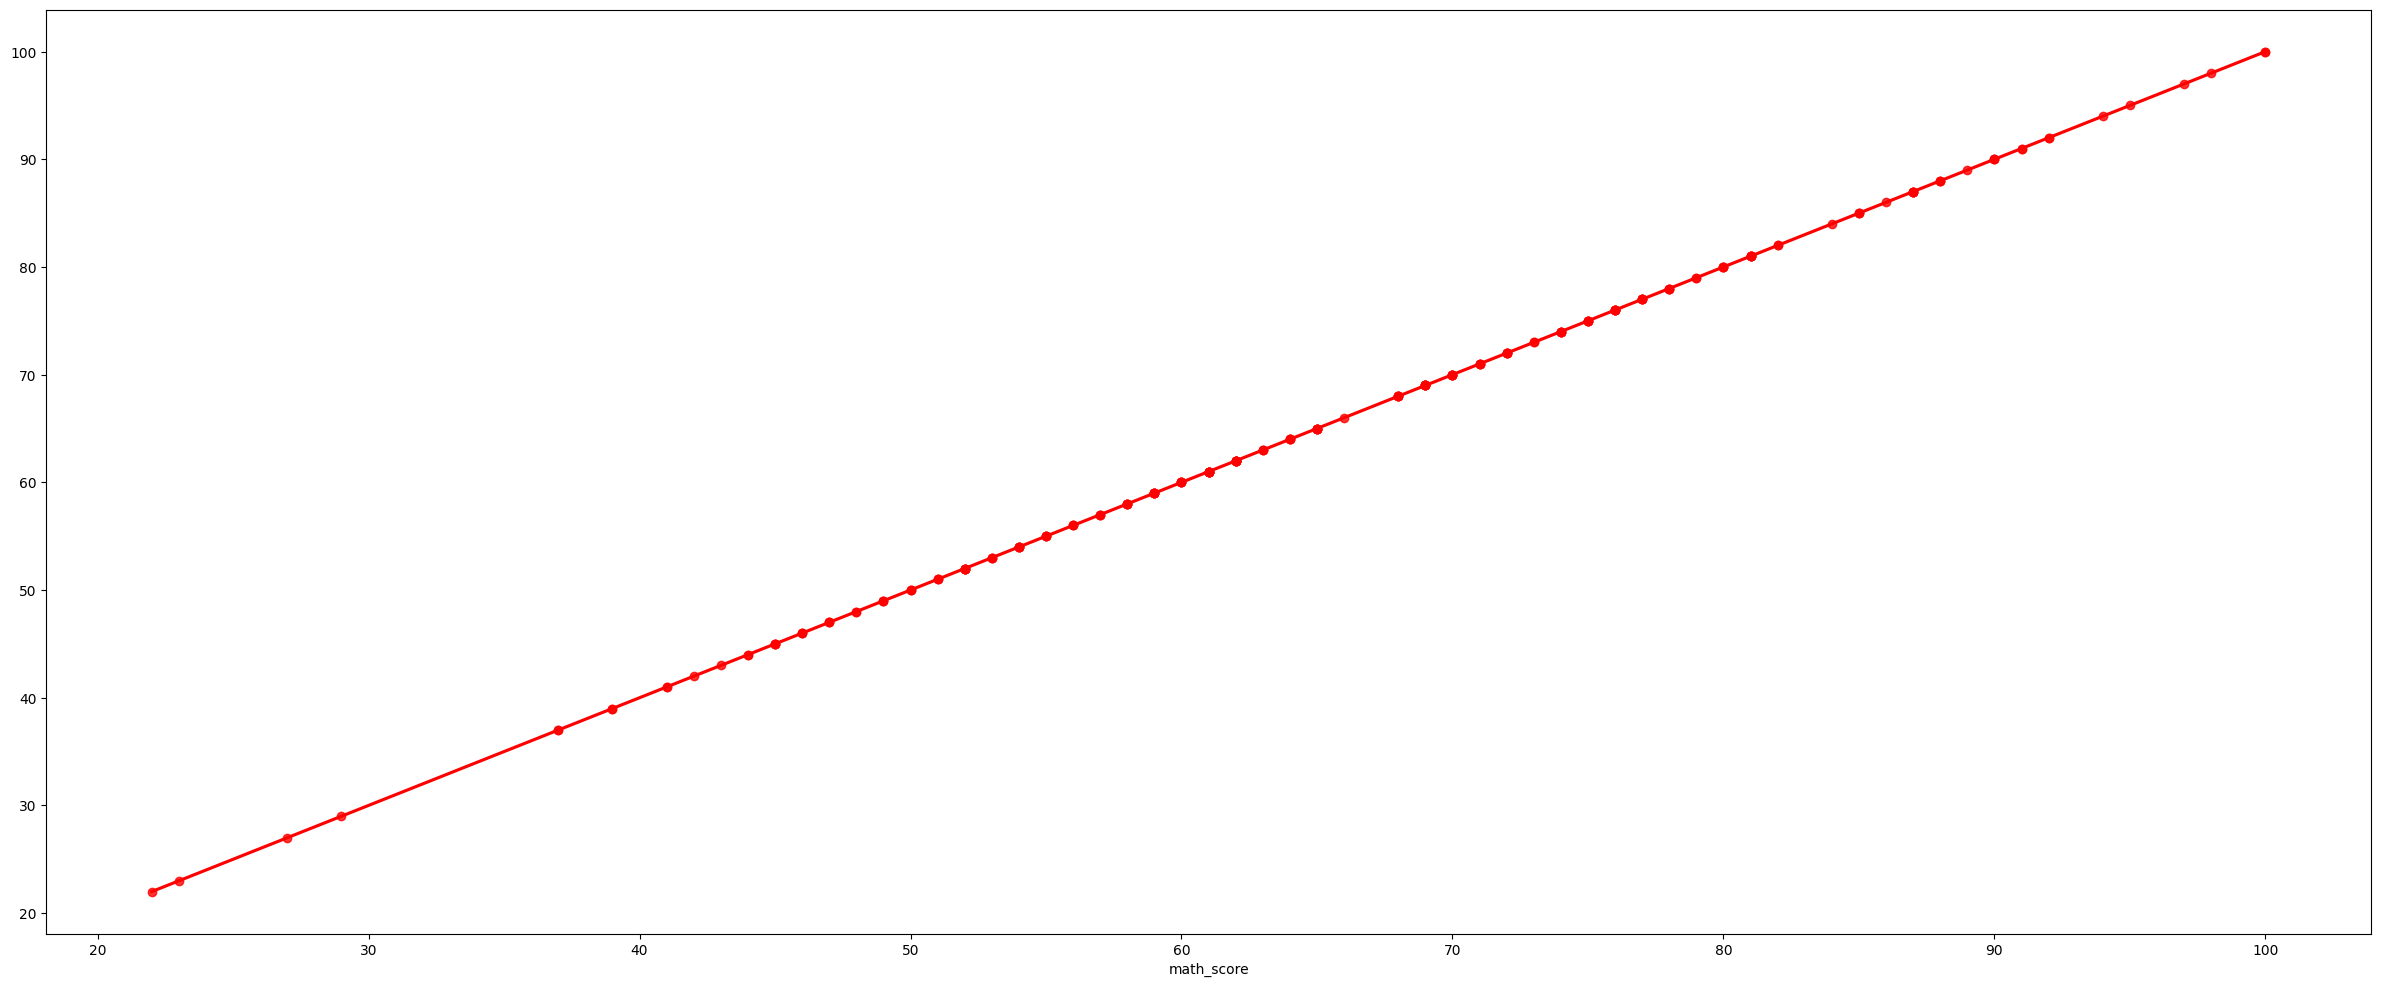

In [45]:
sns.regplot(x=y_test, y=y_pred, ci=None,color = 'red')

# Difference between Actual and Preicted values

In [47]:
pred_df=pd.DataFrame({"Actual Value": y_test,"Predicted Value": y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
118,51,51.0,0.000000e+00
19,54,54.0,5.684342e-14
41,58,58.0,-1.421085e-14
425,62,62.0,1.421085e-14
221,87,87.0,-2.842171e-14
...,...,...,...
714,60,60.0,-2.131628e-14
744,55,55.0,7.105427e-14
671,52,52.0,7.105427e-14
286,97,97.0,-5.684342e-14
